In [1]:
import sys
sys.path.append('../.')
import models

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 36

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


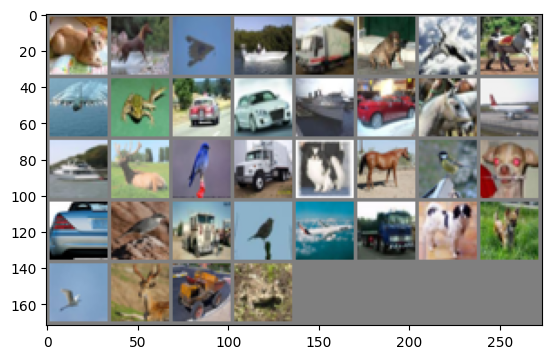

cat   horse plane ship  truck dog   plane horse plane frog  car   car   ship  car   horse plane ship  deer  bird  truck dog   horse bird  dog   car   bird  truck bird  plane truck dog   dog   bird  deer  truck frog 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
images.shape

torch.Size([36, 3, 32, 32])

In [5]:
len(trainloader)

1389

In [6]:
#net = models.CCTransformer(num_classes=10, emb_dim=128, num_blocks=3, num_conv_layers=2, out_channel_outputs=[64, 128], patch_size=None, C=3, max_seq=25)
import models.backbones
import models.detr_zoo
backbone = models.backbones.ConvNextBackbone()
net = models.detr_zoo.DefEncoderCls(backbone, num_cls=10)
net = net.to('cuda')

/home/max/miniconda3/envs/vid_pred/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        #print(f'outputs:{outputs}')
        #print(f'loss:{loss}')
        #break
        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

/home/max/miniconda3/envs/vid_pred/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[1,   200] loss: 0.203
[1,   400] loss: 0.164
[1,   600] loss: 0.147
[1,   800] loss: 0.139
[1,  1000] loss: 0.130


KeyboardInterrupt: 

In [ ]:
loss = [0.209,
0.171,
0.152,
0.141,
0.130,
0.124,
0.112,
0.107,
0.106,
0.101,
0.100,
0.097,
0.091,
0.090,
0.088,
0.087,
0.083,
0.083,
0.077,
0.079,
0.079,
0.078,
0.076,
0.076,
0.068,
0.070,
0.071,
0.071,
0.071,
0.070,
0.063,
0.064,
0.064,
0.067,
0.064,
0.065,
0.059,
0.059,
0.060,
0.061,
0.058,
0.059,
0.053,
0.054,
0.055,
0.056,
0.057,
0.057,
0.049,
0.051,
0.051,
0.054,
0.053,
0.054,
0.046,
0.046,
0.048,
0.049,
0.052,
0.050,
0.043,
0.044,
0.045,
0.047,
0.046,
0.047,
0.041,
0.040,
0.043,
0.043,
0.043,
0.045,
0.037,
0.038,
0.039,
0.041,
0.041,
0.042,
0.035,
0.036,
0.038,
0.038,
0.040,
0.039,
0.032,
0.033,
0.036,
0.037,
0.036,
0.038,
0.030,
0.030,
0.032,
0.034,
0.034,
0.037,
0.027,
0.030,
0.031,
0.032,
0.031,
0.033,
0.025,
0.027,
0.031,
0.032,
0.032,
0.033,
0.025,
0.025,
0.027,
0.028,
0.029,
0.029,
0.022,
0.025,
0.025,
0.026,
0.027,
0.029,
0.019,
0.021,
0.024,
0.023,
0.025,
0.026,
0.018,
0.021,
0.022,
0.024,
0.024,
0.025,
0.018,
0.018,
0.020,]

In [10]:
np.arange(len(loss))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134])

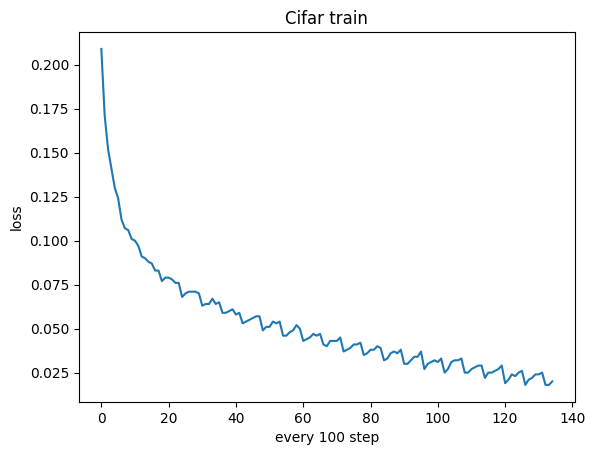

In [11]:
plt.plot(np.arange(len(loss)), loss)
plt.title(f'Cifar train')
plt.xlabel('every 100 step')
plt.ylabel('loss')
plt.show()

In [10]:
1.6575e+3


1657.5

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 71 %
